<a href="https://colab.research.google.com/github/Krohit22/indian_food_cnn_model/blob/main/indian_food_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import cv2
import pathlib

# Download latest version
data_dir = kagglehub.dataset_download("iamsouravbanerjee/indian-food-images-dataset")

print("Path to dataset files:", data_dir)

Using Colab cache for faster access to the 'indian-food-images-dataset' dataset.
Path to dataset files: /kaggle/input/indian-food-images-dataset


In [2]:
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/kaggle/input/indian-food-images-dataset')

In [3]:
print(data_dir)
print(data_dir.exists())

/kaggle/input/indian-food-images-dataset
True


In [4]:
image_count = len(list(data_dir.rglob('*/*.jpg')))
image_count

4000

In [5]:
list(data_dir.rglob('*/*.jpg'))[:5]

[PosixPath('/kaggle/input/indian-food-images-dataset/Indian Food Images/Indian Food Images/mysore_pak/2f6b53cb64.jpg'),
 PosixPath('/kaggle/input/indian-food-images-dataset/Indian Food Images/Indian Food Images/mysore_pak/9cd5c43a97.jpg'),
 PosixPath('/kaggle/input/indian-food-images-dataset/Indian Food Images/Indian Food Images/mysore_pak/2f23a5135e.jpg'),
 PosixPath('/kaggle/input/indian-food-images-dataset/Indian Food Images/Indian Food Images/mysore_pak/4df7c148c9.jpg'),
 PosixPath('/kaggle/input/indian-food-images-dataset/Indian Food Images/Indian Food Images/mysore_pak/9acab1deaa.jpg')]

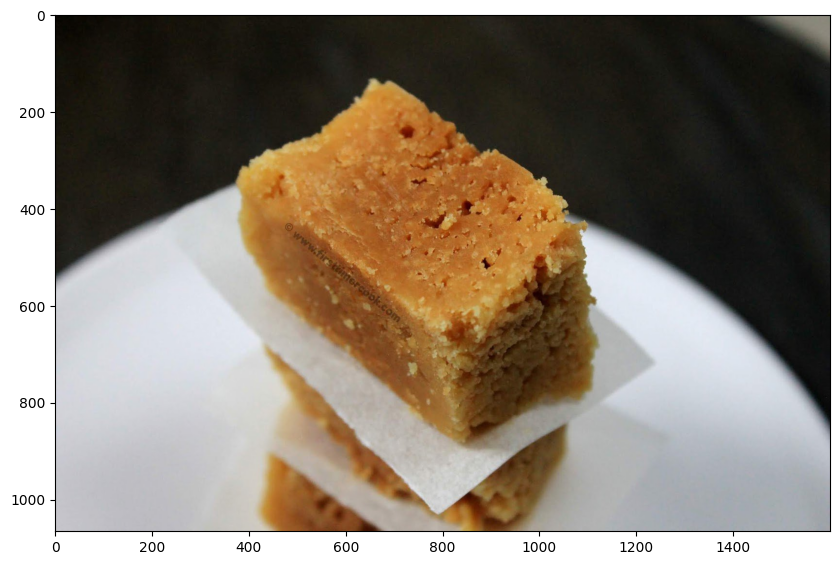

In [6]:
plt.figure(figsize=(10, 10))
plt.imshow(PIL.Image.open(str(list(data_dir.rglob('*/*.jpg'))[0])))


In [7]:
food_list_paths = list(data_dir.rglob("List of Indian Foods.txt"))
print(food_list_paths)  # full path


[PosixPath('/kaggle/input/indian-food-images-dataset/List of Indian Foods.txt')]


In [8]:
if food_list_paths:
    food_list_path = food_list_paths[0]  # <-- Path object, not list

    with open(food_list_path, "r", encoding="utf-8") as f:
      classes = [line.strip() for line in f if line.strip()]

    print(classes[0:])   # first 10 class names
    print(len(classes))   # total number of classes
else:
    print("File not found!")

['adhirasam', 'aloo_gobi', 'aloo_matar', 'aloo_methi', 'aloo_shimla_mirch', 'aloo_tikki', 'anarsa', 'ariselu', 'bandar_laddu', 'basundi', 'bhatura', 'bhindi_masala', 'biryani', 'boondi', 'butter_chicken', 'chak_hao_kheer', 'cham_cham', 'chana_masala', 'chapati', 'chhena_kheeri', 'chicken_razala', 'chicken_tikka', 'chicken_tikka_masala', 'chikki', 'daal_baati_churma', 'daal_puri', 'dal_makhani', 'dal_tadka', 'dharwad_pedha', 'doodhpak', 'double_ka_meetha', 'dum_aloo', 'gajar_ka_halwa', 'gavvalu', 'ghevar', 'gulab_jamun', 'imarti', 'jalebi', 'kachori', 'kadai_paneer', 'kadhi_pakoda', 'kajjikaya', 'kakinada_khaja', 'kalakand', 'karela_bharta', 'kofta', 'kuzhi_paniyaram', 'lassi', 'ledikeni', 'litti_chokha', 'lyangcha', 'maach_jhol', 'makki_di_roti_sarson_da_saag', 'malapua', 'misi_roti', 'misti_doi', 'modak', 'mysore_pak', 'naan', 'navrattan_korma', 'palak_paneer', 'paneer_butter_masala', 'phirni', 'pithe', 'poha', 'poornalu', 'pootharekulu', 'qubani_ka_meetha', 'rabri', 'ras_malai', 'ras

In [9]:
food_image_dict = {}
for food in classes:
    food_image_dict[food] = list(data_dir.rglob(f"{food}/*.jpg"))


In [10]:
print(food_image_dict)

{'adhirasam': [PosixPath('/kaggle/input/indian-food-images-dataset/Indian Food Images/Indian Food Images/adhirasam/14d893495c.jpg'), PosixPath('/kaggle/input/indian-food-images-dataset/Indian Food Images/Indian Food Images/adhirasam/1d8712cb99.jpg'), PosixPath('/kaggle/input/indian-food-images-dataset/Indian Food Images/Indian Food Images/adhirasam/8d63c56cdc.jpg'), PosixPath('/kaggle/input/indian-food-images-dataset/Indian Food Images/Indian Food Images/adhirasam/1a77e9cec2.jpg'), PosixPath('/kaggle/input/indian-food-images-dataset/Indian Food Images/Indian Food Images/adhirasam/5fc5acb884.jpg'), PosixPath('/kaggle/input/indian-food-images-dataset/Indian Food Images/Indian Food Images/adhirasam/3d959a621f.jpg'), PosixPath('/kaggle/input/indian-food-images-dataset/Indian Food Images/Indian Food Images/adhirasam/4ba54c8c49.jpg'), PosixPath('/kaggle/input/indian-food-images-dataset/Indian Food Images/Indian Food Images/adhirasam/4df2abf698.jpg'), PosixPath('/kaggle/input/indian-food-imag

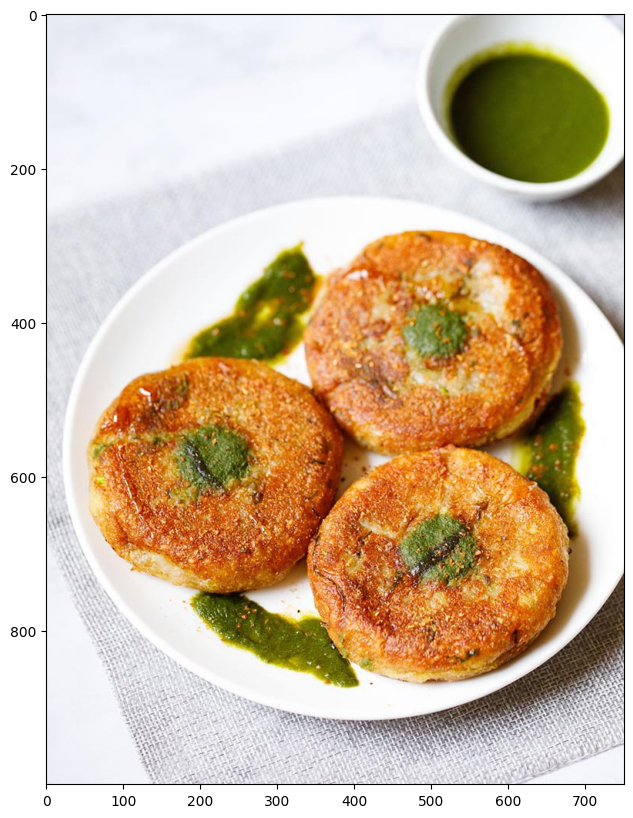

In [11]:
plt.figure(figsize=(10, 10))
plt.imshow(PIL.Image.open(str(food_image_dict['aloo_tikki'][15])))

In [12]:
food_image_dict_labels = {}
i = 0
for food in classes:
    food_image_dict_labels[food] = i
    i += 1

In [13]:
print(food_image_dict_labels)

{'adhirasam': 0, 'aloo_gobi': 1, 'aloo_matar': 2, 'aloo_methi': 3, 'aloo_shimla_mirch': 4, 'aloo_tikki': 5, 'anarsa': 6, 'ariselu': 7, 'bandar_laddu': 8, 'basundi': 9, 'bhatura': 10, 'bhindi_masala': 11, 'biryani': 12, 'boondi': 13, 'butter_chicken': 14, 'chak_hao_kheer': 15, 'cham_cham': 16, 'chana_masala': 17, 'chapati': 18, 'chhena_kheeri': 19, 'chicken_razala': 20, 'chicken_tikka': 21, 'chicken_tikka_masala': 22, 'chikki': 23, 'daal_baati_churma': 24, 'daal_puri': 25, 'dal_makhani': 26, 'dal_tadka': 27, 'dharwad_pedha': 28, 'doodhpak': 29, 'double_ka_meetha': 30, 'dum_aloo': 31, 'gajar_ka_halwa': 32, 'gavvalu': 33, 'ghevar': 34, 'gulab_jamun': 35, 'imarti': 36, 'jalebi': 37, 'kachori': 38, 'kadai_paneer': 39, 'kadhi_pakoda': 40, 'kajjikaya': 41, 'kakinada_khaja': 42, 'kalakand': 43, 'karela_bharta': 44, 'kofta': 45, 'kuzhi_paniyaram': 46, 'lassi': 47, 'ledikeni': 48, 'litti_chokha': 49, 'lyangcha': 50, 'maach_jhol': 51, 'makki_di_roti_sarson_da_saag': 52, 'malapua': 53, 'misi_roti'

In [14]:
x,y = [],[]
for food_name, images in food_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(food_image_dict_labels[food_name])

In [15]:
x = np.array(x)
y = np.array(y)

In [16]:
print(x.shape,y.shape)

(4000, 180, 180, 3) (4000,)


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0, test_size=0.2,stratify=y)

In [18]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [19]:
print (x_train_scaled.shape,x_test_scaled.shape,y_train.shape,y_test.shape)

(3200, 180, 180, 3) (800, 180, 180, 3) (3200,) (800,)


In [ ]:
model = keras.Sequential([
  keras.layers.Conv2D(32,5,padding='same',activation='relu',input_shape = (180,180,3)),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64,5,padding='same',activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(128,5,padding='same',activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Flatten(),
  keras.layers.Dense(256,activation='relu'),
  keras.layers.Dense(80,activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.fit(x_train_scaled, y_train, epochs=10)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
 86/100 ━━━━━━━━━━━━━━━━━━━━ 1:02 4s/step - accuracy: 0.0073 - loss: 4.8991

In [ ]:
model.evaluate(x_test_scaled, y_test)

In [ ]:
predictions = model.predict(x_test_scaled)
predictions

In [ ]:
np.argmax(predictions,axis=1)

In [ ]:
print(y_test[:20])

In [ ]:
data_augmentation = keras.Sequential(
  [
    keras.layers.RandomFlip("horizontal",input_shape=(180,180,3)),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
    ])

In [ ]:
model = keras.Sequential([
  data_augmentation,
  keras.layers.Conv2D(32,5,padding='same',activation='relu',input_shape = (180,180,3)),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64,5,padding='same',activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(128,5,padding='same',activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Dropout(0.2),
  keras.layers.Flatten(),
  keras.layers.Dense(256,activation='relu'),
  keras.layers.Dense(80,activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.fit(x_train_scaled, y_train, epochs=10)

In [ ]:
model.evaluate(x_test_scaled, y_test)